# Moving Average

In [1]:
import pandas as pd
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('DATA/P100254-1 (G43L) CDU-HGO.CSV')

In [3]:
df.head()

,"=""ID""",Name,Sent Time,UT measurement (mm),Temperature (°C),PSI,Apply Temperature Compensation Flag
0,"=""#00096""","=""P100254-1""",2017-05-16 06:24:14,6.298,283.06,NaN,1
1,"=""#00096""","=""P100254-1""",2017-05-16 18:29:47,6.296,283.62,NaN,1
2,"=""#00096""","=""P100254-1""",2017-05-17 06:32:58,6.300,284.41,NaN,1
3,"=""#00096""","=""P100254-1""",2017-05-17 18:36:07,6.303,284.28,NaN,1
4,"=""#00096""","=""P100254-1""",2017-05-18 06:39:23,6.301,284.66,NaN,1


In [4]:
df = df[['Sent Time','UT measurement (mm)']]

## Simple Moving Average

In [5]:
df['SMA_'] = df['UT measurement (mm)'].rolling(window=28).mean().shift(-8) #Reason for shift 8 can be found below

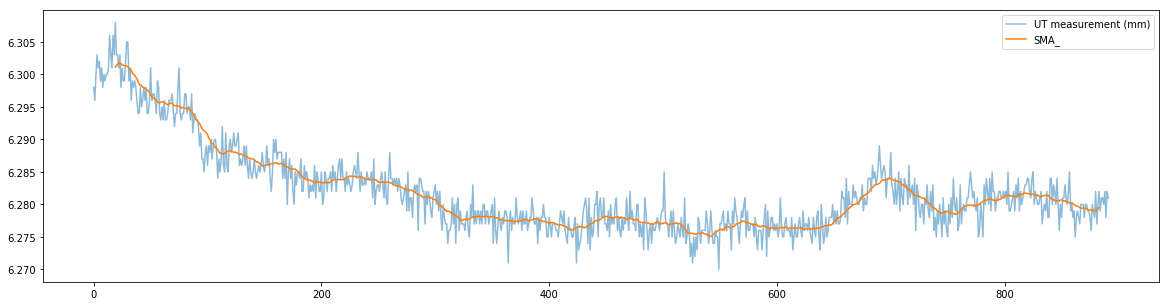

In [6]:
df['UT measurement (mm)'].plot(alpha=0.5,figsize=(20,5),legend=True);
df['SMA_'].plot(legend=True);

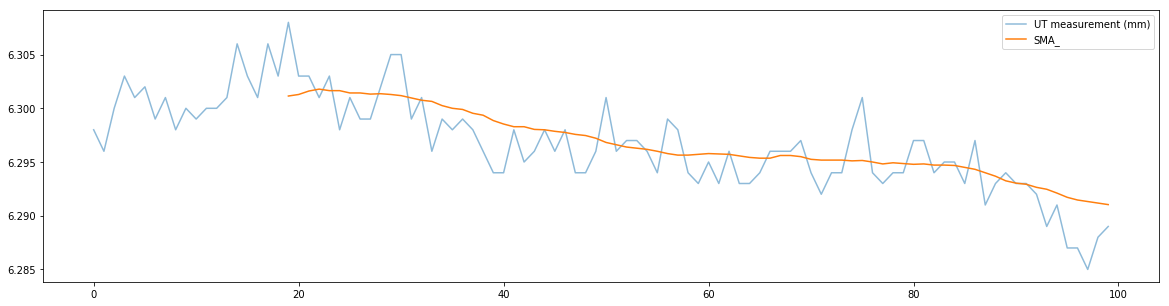

In [7]:
df['UT measurement (mm)'].iloc[0:100].plot(alpha=0.5,figsize=(20,5),legend=True);
df['SMA_'].iloc[0:100].plot(legend=True);

## Exponentially Weighted Moving Average

In [8]:
df['EMWA_'] = df['UT measurement (mm)'].ewm(span=28,adjust=False).mean()

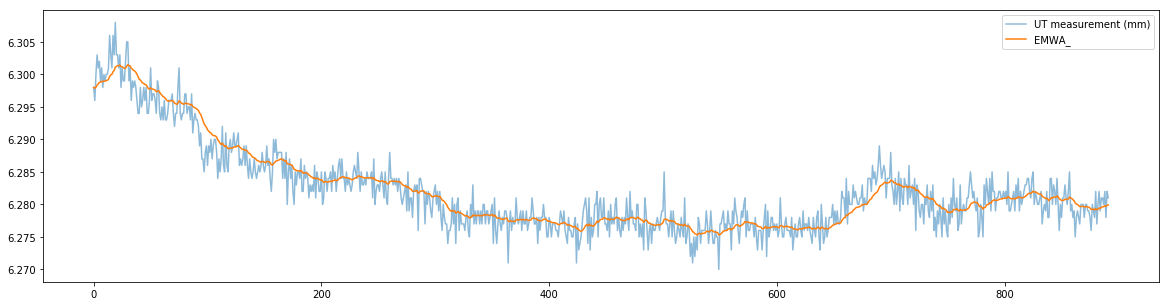

In [9]:
df['UT measurement (mm)'].plot(alpha=0.5,figsize=(20,5),legend=True);
df['EMWA_'].plot(legend=True);

## SMA and EWMA evaluation

In [10]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [11]:
df.dropna(inplace=True)

In [12]:
# SMA
mae = mean_absolute_error(df['UT measurement (mm)'],df['SMA_'])
mse = mean_squared_error(df['UT measurement (mm)'],df['SMA_'])
print('SMA')
print('mae = ',mae)
print('mse = ',mse)

SMA
mae =  0.0016589595375722025
mse =  4.431429161259565e-06


In [13]:
# EMWA
mae = mean_absolute_error(df['UT measurement (mm)'],df['EMWA_'])
mse = mean_squared_error(df['UT measurement (mm)'],df['EMWA_'])
print('EMWA')
print('mae = ',mae)
print('mse = ',mse)

EMWA
mae =  0.0017369115444465877
mse =  4.851707842254097e-06


In [14]:
#Optimal Time shift for SMA
sma_mae = []
df1 = pd.read_csv('DATA/P100254-1 (G43L) CDU-HGO.CSV')
df1 = df1[['UT measurement (mm)']]
for x in range(-28,0):
    df1['SMA_'] = df1['UT measurement (mm)'].rolling(window=28).mean().shift(x)
    df1.dropna(inplace=True)
    z = mean_absolute_error(df1['UT measurement (mm)'],df1['SMA_'])
    sma_mae.append(z)

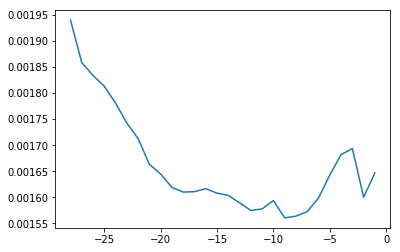

In [15]:
plt.plot(range(-28,0),sma_mae)

In [16]:
# Optimal EMWA order
emwa_mae = []
for x in range(0,874):
    if x > 0 :
        y = df['UT measurement (mm)'].ewm(span=x,adjust=False).mean()
        z = mean_absolute_error(df['UT measurement (mm)'],y)
        emwa_mae.append(z)

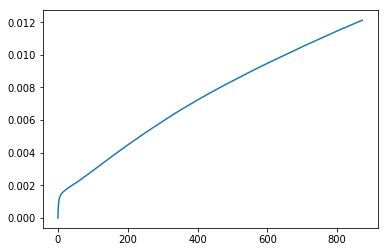

In [17]:
plt.plot(emwa_mae)